# This one has Merkle tree initializer, merkle function and Chunk Modification function

In [2]:
import hashlib as hs
class Hash:
    def __init__(self,val) :
        self.val=val
        self.left=None
        self.right=None

def initial(lt):
    if len(lt)%2!=0:
        lt.append(lt[-1])
    tp=[]
    for i in range(0,len(lt)):
        x=hs.sha256()
        x.update(lt[i])
        lt[i]=x.hexdigest()
        obj=Hash(lt[i])   #hashing at leaf aswell
        tp.append(obj)
    return mkl(lt,tp,0)

def mkl(chunks,prev_obj,sum):
    sum+=1
    if len(prev_obj)==1:
        print('depth -> ',sum)
        return prev_obj[0]
    if len(chunks)%2!=0:
        chunks.append(chunks[-1])
        prev_obj.append(prev_obj[-1])
    lg=len(chunks)
    print(lg)

    tp=[]
    for i in range(0,lg,2):
        x=hs.sha256()
        x.update(chunks[i].encode()+chunks[i+1].encode())
        tp.append(x.hexdigest())
    chunks=tp.copy()
    j=0

    tp=[]
    for i in chunks:
        ob=Hash(i)
        tp.append(ob)
        ob.left=prev_obj[j]
        ob.right=prev_obj[j+1]
        j+=2
    return mkl(chunks,tp,sum)

def dfs(x,v):
    if x is None:
        return
    lt=[x.left,x.right]
    for i in lt:
        if i!=None:
            print(v,' - ',i.val)
            dfs(i,v+1)
    return

def Modify_chunk(wich1,new1,node):
    if node is None:
        return
    lt=[]
    chk=False
    hsh=False
    for i in [node.left,node.right]:
        if i!=None:
            lt.append(i.val)
            if not chk:
                if i.val==wich1:
                    chk=hs.sha256()
                    chk.update(new1)
                    new1=chk.hexdigest()
                    # print('yes')
                    lt.remove(i.val)
                    i.val=new1
                    chk=True
                    lt.append(new1)
                else:
                    hsh=Modify_chunk(wich1,new1,i)
                    if hsh:
                        lt.pop(-1)
                        lt.append(hsh)
                        chk=True
                        i.val=hsh
    if chk:
        # print(True)
        chk=hs.sha256()
        chk.update(lt[0].encode()+lt[1].encode())
        return chk.hexdigest()
    return

# This is for giving input

In [9]:
# with open(r"C:\Users\Krish\Downloads\CB.EN.U4AIE22002_BIO_A3.docx",'rb') as f:
#     values=[]
#     data=True
#     while data:
#         data=f.read(1024)
#         values.append(data)
#     values.pop(-1)
#     x=initial(values)
#     print(f'final root -> {x.val}\n')
#     #no of nodes... using dfs
#     # dfs(x,1)


lt=['a','b','c','d','e','f','g','h']
lt=[i.encode() for i in lt]
x=initial(lt)
print(f"final - {x.val}\n\n")
dfs(x,1)

8
4
2
depth ->  4
final - 5d2a8967adb92f46e3266c0cddef844418e95fc6dbe733029e8a7da6145a5afe


1  -  58c89d709329eb37285837b042ab6ff72c7c8f74de0446b091b6a0131c102cfd
2  -  62af5c3cb8da3e4f25061e829ebeea5c7513c54949115b1acc225930a90154da
3  -  ca978112ca1bbdcafac231b39a23dc4da786eff8147c4e72b9807785afee48bb
3  -  3e23e8160039594a33894f6564e1b1348bbd7a0088d42c4acb73eeaed59c009d
2  -  d3a0f1c792ccf7f1708d5422696263e35755a86917ea76ef9242bd4a8cf4891a
3  -  2e7d2c03a9507ae265ecf5b5356885a53393a2029d241394997265a1a25aefc6
3  -  18ac3e7343f016890c510e93f935261169d9e3f565436429830faf0934f4f8e4
1  -  d6cf2ad3f66d0599d97346c6aad0f1081913df26d8b80e4ffa052e0a1f8391c6
2  -  1b3dae70b4b0a8fd252a7879ec67283c0176729bfebc51364fb9e9fb0598ba9e
3  -  3f79bb7b435b05321651daefd374cdc681dc06faa65e374e38337b88ca046dea
3  -  252f10c83610ebca1a059c0bae8255eba2f95be4d1d7bcfa89d7248a82d9f111
2  -  520328b68932e91dbd3194a6d12050ffa99d1dc603400c375850a888d2706135
3  -  cd0aa9856147b6c5b4ff2b7dfee5da20aa38253099ef1b4a6

# Merkle Tree of above input

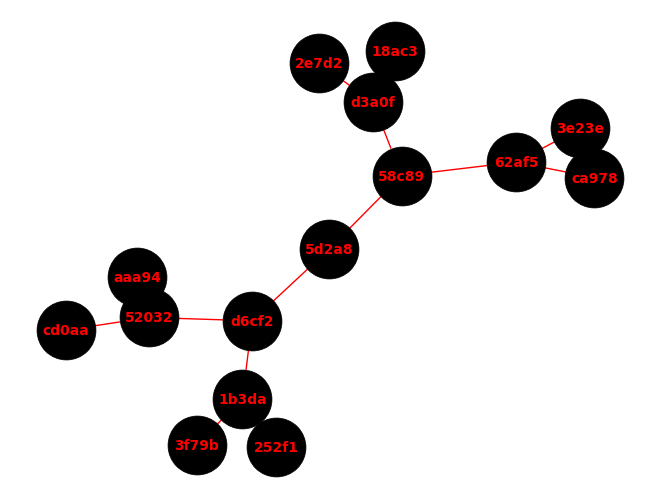

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def dfs_viz(node, G):
    if node is None:
        return
    for i in [node.left,node.right]:
        if i!=None:
            G.add_edge(node.val[:5],i.val[:5])
            G.add_node(i.val[:5])
            dfs_viz(i,G)
    return

def viz(tree):
    G = nx.Graph()
    G.add_node(tree.val[:5])
    dfs_viz(tree,G)

    plt.figure(facecolor='grey')
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1800, node_color='black', font_size=10, font_color='red', font_weight='bold', edge_color='red', linewidths=0.5, arrowsize=20,arrows=True)
    plt.show()

viz(x)

# This is for modifying a chunk... i just modified an element from a list... if u want give a chunk of some data and modify... Inputs ->  Modify_chunk(HashOfReplacingChunk,newChunkValue(not hash one),TreeObject)

after replacing 'g' with 'i' ->   0724c674e6ac45eeb4cb6180633c7333e6af9b4bd36e48253f3eab5d1cc082ab


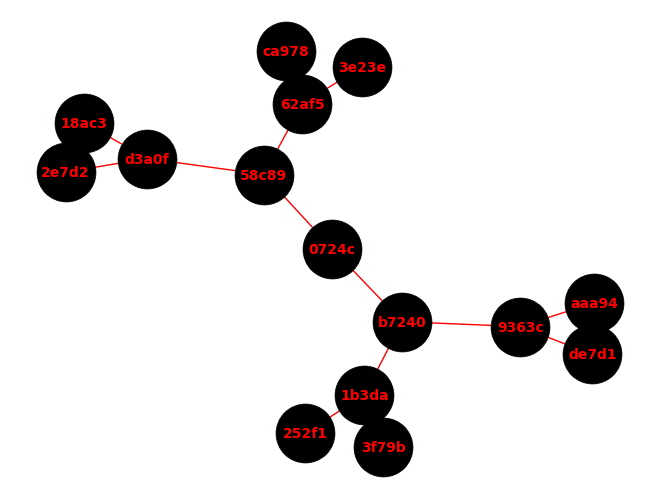

In [11]:
a=hs.sha256()
a.update('g'.encode())
a=a.hexdigest()
x.val=Modify_chunk(a,'i'.encode(),x)
print("after replacing 'g' with 'i' ->  ",x.val)
viz(x)

## To run the 👆👆👆, run the second cell and then third cell, always... coz if u only run 3, the value is already replaced in tree, and it wont modify again

# This is for just verifying our hash value, using for and while loops (file reading)

In [6]:
import hashlib as hs
with open(r"C:\Users\Krish\Downloads\CB.EN.U4AIE22002_BIO_A3.docx",'rb') as f:
    lt=[]
    data=True
    while data:
        data=f.read(1024)
        lt.append(data)
    lt.pop(-1)
    if len(lt)%2!=0:lt.append(lt[-1])
    tp=[]
    for i in lt:
        x=hs.sha256()
        x.update(i)
        tp.append(x.hexdigest())

    c=0
    while len(tp)!=1:
        lt=[]
        if len(tp)%2!=0:tp.append(tp[-1])
        print(len(tp))
        for i in range(0,len(tp),2):
            x=hs.sha256()
            x.update(tp[i].encode()+tp[i+1].encode())
            lt.append(x.hexdigest())
        tp=lt.copy()
        c+=1
    print('final root -> ',tp)

490
246
124
62
32
16
8
4
2
final root ->  ['e64ad3dc4f9bbee6ebb3358032a5d377b016df12d8bc8f6c07e14cb75b70bbd7']


# This is for just verifying our hash value, using for and while loops (List value)

In [12]:
import hashlib as hs
lt=['a','b','c','d','e','f','i','h']  #gave the value which has to be replaced
if len(lt)%2!=0:lt.append(lt[-1])
tp=[]
for i in lt:
    x=hs.sha256()
    x.update(i.encode())
    tp.append(x.hexdigest())

c=0
while len(tp)!=1:
    lt=[]
    if len(tp)%2!=0:tp.append(tp[-1])
    print(len(tp))
    for i in range(0,len(tp),2):
        x=hs.sha256()
        x.update(tp[i].encode()+tp[i+1].encode())
        lt.append(x.hexdigest())
    tp=lt.copy()
    c+=1
print('final root -> ',tp)

8
4
2
final root ->  ['0724c674e6ac45eeb4cb6180633c7333e6af9b4bd36e48253f3eab5d1cc082ab']


# Verify Part

In [13]:
if'0724c674e6ac45eeb4cb6180633c7333e6af9b4bd36e48253f3eab5d1cc082ab'=='0724c674e6ac45eeb4cb6180633c7333e6af9b4bd36e48253f3eab5d1cc082ab':
    print('same')

same
